In [63]:
## Read MAXBRG output file for each case
import numpy as np
filename = 'c:\\dropbox\\romac\\work\\BAA\\El20x40m1.out'
file = open(filename,'r')
npad = 2      # elliptical bearings
count = 30
speed=np.zeros(count)
specload=np.zeros(count)
somm=np.zeros(count)
hmin=np.zeros(count)
tmax=np.zeros(count)
caseCount = -1
# Generate table with speed, load, Sommerfeld, hmin, tmax
for line in file:
    if "MAXBRG" in line:
        print (line)
    if "Speed(RPM)" in line:
        caseCount=caseCount+1
        data = line.split()
        #print ("Speed ",data[1]," rpm")
        #print ("Specific load ",data[4]," psi")
        speed[caseCount]=data[1]
        specload[caseCount]=data[4]
    if "Sommerfeld Number" in line:
        data=line.split()
        #print ("Sommerfeld number ",data[2])
        somm[caseCount]=data[2]
    if "Eccentricity" in line:
        data = line.split()
        #print ("Eccentricity ",data[2]," at ",data[5]," degrees")
    if "Hmin (IN)" in line:
        for i in range(npad):
            hminline = file.readline()
            data = hminline.split()
            #print ("Pad #",data[0]," hmin ",data[4]," inches")
            hmin[caseCount]= float(data[4])*1000.0  # mils
    if "Maximum Pad Temperature=" in line:
        data = line.split()
        #print ("Tmax ",data[3]," on pad#",data[8])
        tmax[caseCount]=data[3]
        #print()
caseCount = caseCount+1
file.close()
print("Case Speed  SpecLoad  Sommerfeld   Hmin  Tmax")
print("  #    rpm     psi       dim       mils    F")
for i in range(caseCount):
    print("%2d   %.1f    %5.0f    %.3f      %.2f  %.1f"
          % (i,speed[i],specload[i],somm[i],hmin[i],tmax[i]))

 MAXBRG Version 5.2 (Nov 2010)    

 Scratched elliptical 20x40  [MAXBRG 01-08-18]]                                  

MAXBRG RESULTS OF CASE # 1:

MAXBRG RESULTS OF CASE # 2:

MAXBRG RESULTS OF CASE # 3:

MAXBRG RESULTS OF CASE # 4:

MAXBRG RESULTS OF CASE # 5:

MAXBRG RESULTS OF CASE # 6:

MAXBRG RESULTS OF CASE # 7:

MAXBRG RESULTS OF CASE # 8:

MAXBRG RESULTS OF CASE # 9:

MAXBRG RESULTS OF CASE #10:

MAXBRG RESULTS OF CASE #11:

MAXBRG RESULTS OF CASE #12:

MAXBRG RESULTS OF CASE #13:

MAXBRG RESULTS OF CASE #14:

MAXBRG RESULTS OF CASE #15:

MAXBRG RESULTS OF CASE #16:

MAXBRG RESULTS OF CASE #17:

MAXBRG RESULTS OF CASE #18:

MAXBRG RESULTS OF CASE #19:

MAXBRG RESULTS OF CASE #20:

Case Speed  SpecLoad  Sommerfeld   Hmin  Tmax
  #    rpm     psi       dim       mils    F
 0   5400.0     2800    0.028      1.78  271.4
 1   5400.0     2800    0.028      1.78  271.3
 2   5400.0     2900    0.027      1.70  272.6
 3   5400.0     3000    0.026      1.64  273.9
 4   5400.0     3100  

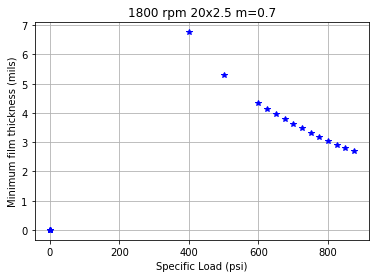

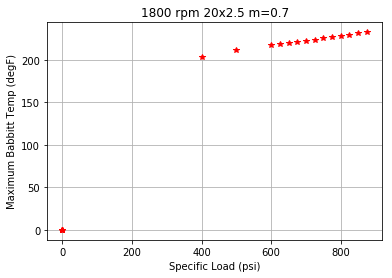

In [20]:
import matplotlib.pyplot as plt
fig,axH=plt.subplots()
axH.plot(specload,hmin,'b*')
#axH.axis([1000,3000,0,4.0])
graphTitle='1800 rpm 20x2.5 m=0.7'
axH.set_title(graphTitle)
axH.set_xlabel('Specific Load (psi)')
axH.set_ylabel('Minimum film thickness (mils)')
axH.grid(True)
plt.show
fig,axT=plt.subplots()
axT.plot(specload,tmax,'r*')
#axT.axis([1000,3000,100,250])
axT.set_title(graphTitle)
axT.set_xlabel('Specific Load (psi)')
axT.set_ylabel('Maximum Babbitt Temp (degF)')
axT.grid(True)
plt.show()